# **MNIST Handwritten Digit Classification using DL (Neural Network)**

Importing dependencies

*   List item
*   List item



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist #MNIST is the dataset of machine learning
from tensorflow.math import confusion_matrix


Loading the MNIST data from keras.datasets

In [ ]:
(X_train ,Y_train),(X_test,Y_test)=mnist.load_data()

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
#shape of the numpy arrays
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Trainnig data = 60,000 images

Test data = 10 k images

Image dimension 28 x 28

Grayscale Image --> 1 channel


In [ ]:
#printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


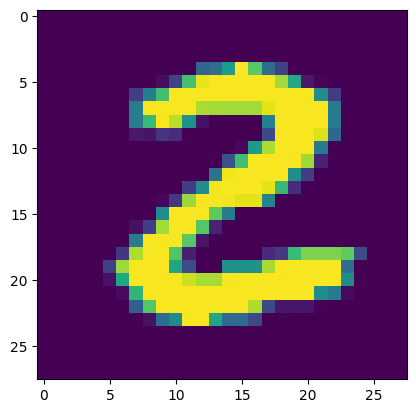

2


In [ ]:
#displaying the image

plt.imshow(X_train[25])
plt.show()

#printing the corresponding label
print(Y_train[25])

Image labels

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
#printing unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [ ]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

#because max value in the matricx id 255 and min is zero and we want it in same range
#and we are creatindg range 0 to 1 as max value is 255 therefore 255/255=1 and other values vary in between

In [ ]:
# printing the 10th image

print(X_train[10])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building the Neural Network**

In [ ]:
#setting up the layers of the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [ ]:
#compiling the Neural Network
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(X_train,Y_train,epochs=11)

Epoch 1/11
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3111 - accuracy: 0.9093
Epoch 2/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1392 - accuracy: 0.9587
Epoch 3/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1037 - accuracy: 0.9684
Epoch 4/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0829 - accuracy: 0.9747
Epoch 5/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0687 - accuracy: 0.9788
Epoch 6/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0585 - accuracy: 0.9817
Epoch 7/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0511 - accuracy: 0.9837
Epoch 8/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0443 - accuracy: 0.9855
Epoch 9/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0385 - accuracy: 0.9877
Epoch 10/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.035

epoch means how many number times our Neural Network go through the data

Training data accuracy = 99.42 %


**Accuracy on Test data**

In [ ]:
loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy," ",loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0977 - accuracy: 0.9748
0.9747999906539917   0.09769199788570404


In [ ]:
print(X_test.shape)

(10000, 28, 28)


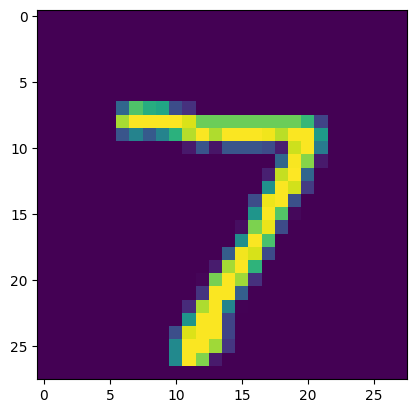

In [ ]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[1.3436243e-02 4.3549342e-03 2.1137668e-01 5.8844274e-01 1.8110120e-05
 1.7457129e-03 1.8995696e-07 9.9998105e-01 3.4135535e-01 5.0466612e-02]


in above it is predicting for 1st input that is X_test[0] and it is giving probability for each number from 0 to 9 and whichever id high that is our ans

In [ ]:
label_for_first = np.argmax(Y_pred[0]);
print (label_for_first)

7


In [ ]:
# converting the prediction probabilities to class label for all test data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 5, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 963    0    2    2    3    1    7    0    1    1]
 [   0 1125    3    2    0    0    2    0    3    0]
 [   3    2 1005    4    1    0    1    8    8    0]
 [   0    0    6  985    0   10    0    3    4    2]
 [   0    0    2    1  967    0    3    2    0    7]
 [   1    1    0   13    1  869    4    0    3    0]
 [   4    3    2    1    4    4  937    1    2    0]
 [   0    8    8    3    3    0    0  991    8    7]
 [   1    2    3    5    3    6    3    3  945    3]
 [   1    2    1    8   15   15    0    5    4  958]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Lables')

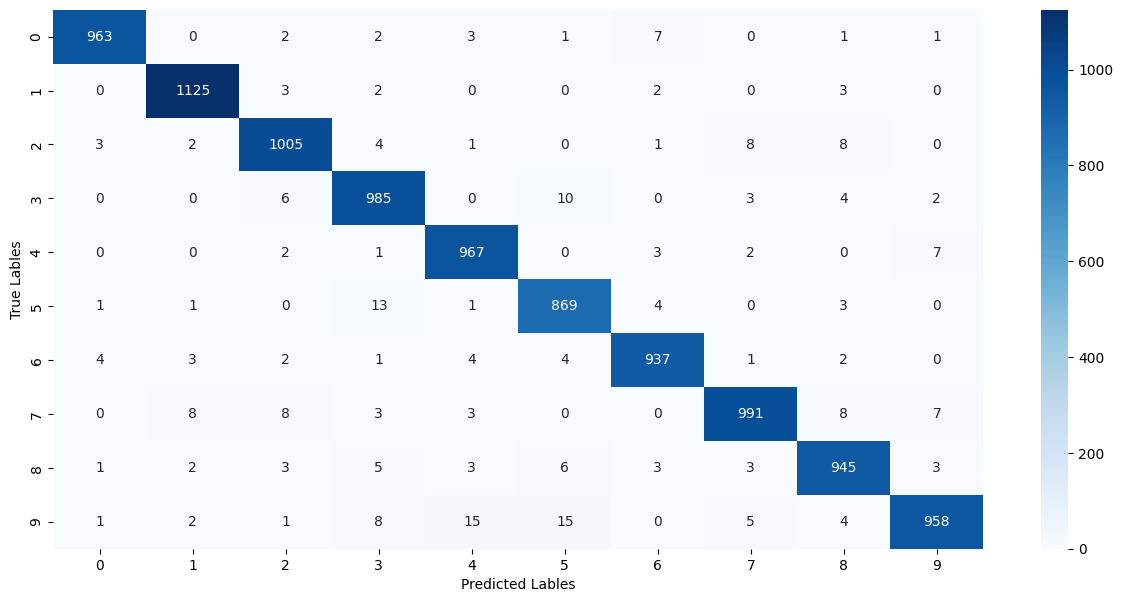

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap="Blues")
plt.ylabel('True Lables')
plt.xlabel('Predicted Lables')

Building a Predictive System

In [ ]:
img = cv2.imread('/content/MNIST_digit_DL_prj2.png')

In [ ]:
type(img)

numpy.ndarray

In [ ]:
print(img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


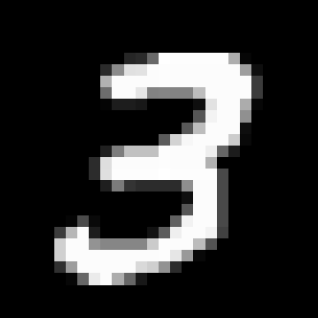

In [ ]:
cv2_imshow(img)

In [ ]:
img.shape

(318, 318, 3)

In [ ]:
#Resize the image
img_resized = cv2.resize(img,(28,28))

In [ ]:
print(img_resized.shape)

(28, 28, 3)


In [ ]:
cv2_imshow(img_resized)

In [ ]:
grayscale = cv2.cvtColor(img_resized,cv2.COLOR_RGB2GRAY)

In [ ]:
type(grayscale)

numpy.ndarray

In [ ]:
cv2_imshow(grayscale)

In [ ]:
cv2.imwrite('gr.jpg',grayscale)
cv2.imwrite('org.jpg',img_resized)

True

here in above we took only data now we want to do all steps we do with training data

In [ ]:
#for values in same range because our model for that data range


In [ ]:
grayscale = grayscale/255


In [ ]:
image_reshaped = np.reshape(grayscale,[1,28,28])

#before in reshaping we give 1,-1 to tell that we are giving only one value
#similarly here 1 indicate we are giving only one input with the size
#also if we are giving rgb image we need to mension 1,28,28,3

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 21ms/step
[[2.7211351e-07 9.5414317e-01 1.3200672e-03 1.0000000e+00 4.8966126e-10
  8.2792360e-01 1.0936331e-13 1.4646102e-04 7.4841874e-04 9.5026201e-01]]


In [ ]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


**Predictive System**

Path of the image to be predicted: /content/MNIST_digit_DL_prj2.png


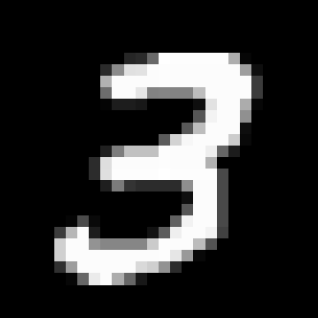

1/1 [==============================] - 0s 23ms/step
The Handwritten Digit is recognised as  3


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)